<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW0/4105_HW0_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Defining Functions used

In [ ]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

Reading D3 Dataset

In [ ]:
df = pd.read_csv('D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5 

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


Visualizing D3 Dateset

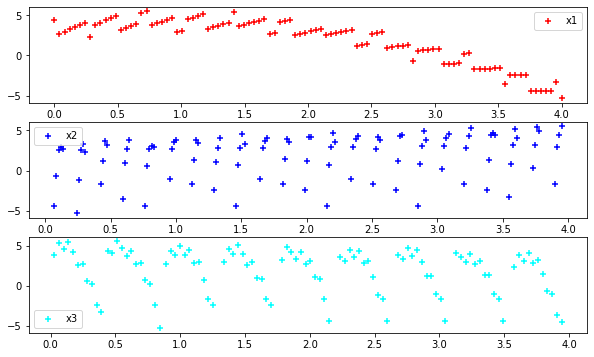

In [ ]:
x1 = df.values[:, 0]  # get input values from first column 
x2 = df.values[:, 1]  # get output values from second column 
x3 = df.values[:, 2]  # get output values from third column 
y = df.values[:, 3]  # get output values from fourth column 
m = len(y) # Number of training examples 
fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].scatter(x1,y, color='red',marker= '+', label='x1') 
ax[1].scatter(x2,y, color='blue',marker= '+', label='x2') 
ax[2].scatter(x3,y, color='cyan',marker= '+', label='x3') 
ax[0].legend() 
ax[1].legend() 
ax[2].legend() 
plt.show()

Variable for Explanatory Variable and Creating Matrix for Gradient Descent

In [26]:
#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# Using reshape function convert X 1D array to 2D array of dimension 100x1 
x1 = x1.reshape(m, 1) 
x2 = x2.reshape(m, 1) 
x3 = x3.reshape(m, 1) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, x1, x2, x3)) 

Training

In [88]:
# Learning Rate
alpha = 0.03; 

In [89]:
theta = [0., 0., 0., 0.] 
iterations = 1500; 




theta, cost_history = gradient_descent(X, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

Final value of theta = [ 5.25606097 -1.99551081  0.54216503 -0.25708468]
cost_history = [4.71048139 4.32282567 4.08518061 ... 0.73864626 0.73864517 0.73864409]


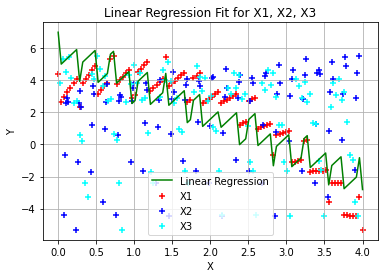

In [90]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'X1') 
plt.scatter(X[:,2], y, color='blue', marker= '+', label= 'X2') 
plt.scatter(X[:,3], y, color='cyan', marker= '+', label= 'X3') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit for X1, X2, X3') 
plt.legend() 

Final Cost = 0.7386440920469524


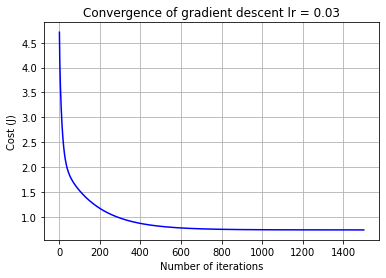

In [93]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent lr = 0.03') 
print('Final Cost =', cost_history[-1]) 

In [97]:
a = 1
b = 1
c = 1
Predict = theta[0] + a*theta[1] + b*theta[2] + c*theta[3]
print("Prediction for (",a,", ",b,", ",c,") is: ",Predict)

Prediction for ( 1 ,  1 ,  1 ) is:  3.545630515470255


In [98]:
a = 2
b = 0
c = 4
Predict = theta[0] + a*theta[1] + b*theta[2] + c*theta[3]
print("Prediction for (",a,", ",b,", ",c,") is: ",Predict)

Prediction for ( 2 ,  0 ,  4 ) is:  0.23670064969674898


In [99]:
a = 3
b = 2
c = 1
Predict = theta[0] + a*theta[1] + b*theta[2] + c*theta[3]
print("Prediction for (",a,", ",b,", ",c,") is: ",Predict)

Prediction for ( 3 ,  2 ,  1 ) is:  0.09677392769914245
